## Fit three experiments in different buffers (with paired blanks) to determine buffer-independent enthalpy and number of protons exchanged on binding
Fits binding of calcium onto EDTA in HEPES, Tris, and Imidazole.

In [1]:
%matplotlib inline
import pytc

# Fit successful? True
# 2017-05-16 09:02:55.402106
# Units: cal/mol
# Fit type: maximum likelihood
# AIC: 961.1902587511507
# AICc: 962.5494820521216
# BIC: 1010.3399244564511
# F: 121809.06645397567
# Rsq: 0.99978728058228
# Rsq_adjusted: 0.9997790727590882
# df: 312
# ln(L): -467.59512937557537
# num_obs: 324
# num_param: 12
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
global,hepes_intercept,NA,-2.01588e-01,1.86835e-02,-2.38350e-01,-1.64827e-01,False,0.00000e+00,-inf,inf
global,imid_heat,NA,3.48387e+03,1.44420e+02,3.19971e+03,3.76804e+03,False,0.00000e+00,-inf,inf
global,tris_intercept,NA,-2.30811e-02,1.83075e-02,-5.91033e-02,1.29412e-02,False,0.00000e+00,-inf,inf
global,global_K,NA,4.33275e+07,3.13320e+05,4.27110e+07,4.39439e+07,False,1.00000e+06,-inf,inf
global,hepes_heat,NA,-4.04131e+02,1.54735e+02,-7.08590e+02,-9.96713e+01,False,0.00000e+00,-inf,inf
global,np_dH_intrinsic,NA,7.70482e+02,6.94065e+00,7.56825e+02,7.84138e+02,False,0.00000e+00,-inf,

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


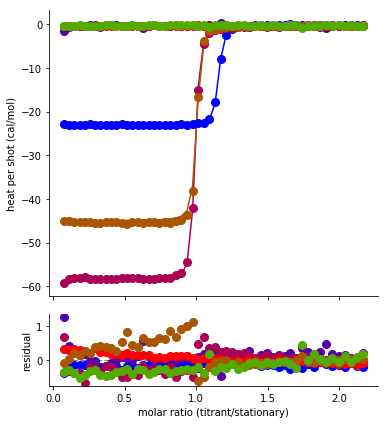

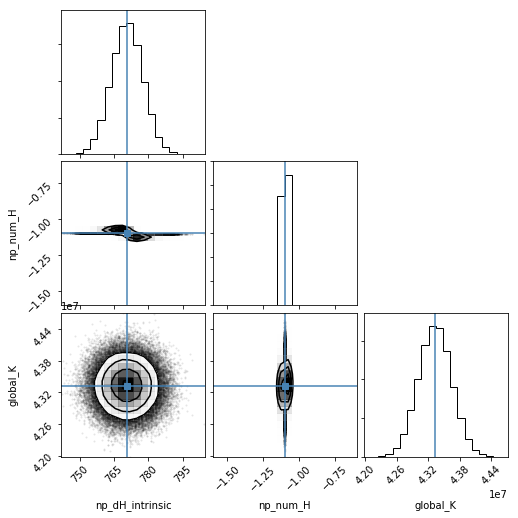

In [2]:
# --------------------------------------------------------------------
# define buffer ionization enthalpies.
# goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
HEPES_IONIZATION_DH = 20.4/4.184*1000 # cal/mol
TRIS_IONIZATION_DH = 47.45/4.184*1000 # cal/mol
IMID_IONIZATION_DH = 36.64/4.184*1000 # cal/mol 

from pytc import global_connectors

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()
num_protons = global_connectors.NumProtons("np")

# ------------------------------------------------------------------------------------
# HEPES buffer experiment

hepes = pytc.ITCExperiment("ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
hepes.ionization_enthalpy = HEPES_IONIZATION_DH

g.add_experiment(hepes)
g.link_to_global(hepes,"K","global_K")
g.link_to_global(hepes,"dH",num_protons.dH)
g.link_to_global(hepes,"dilution_heat","hepes_heat")
g.link_to_global(hepes,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# HEPES buffer blank

hepes_blank = pytc.ITCExperiment("ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)
hepes.ionization_enthalpy = HEPES_IONIZATION_DH

g.add_experiment(hepes_blank)
g.link_to_global(hepes_blank,"dilution_heat","hepes_heat")
g.link_to_global(hepes_blank,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer experiment

tris = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
tris.ionization_enthalpy = TRIS_IONIZATION_DH

g.add_experiment(tris)
g.link_to_global(tris,"K","global_K")
g.link_to_global(tris,"dH",num_protons.dH)
g.link_to_global(tris,"dilution_heat","tris_heat")
g.link_to_global(tris,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer blank

tris_blank = pytc.ITCExperiment("ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=2)
tris.ionization_enthalpy = TRIS_IONIZATION_DH

g.add_experiment(tris_blank)
g.link_to_global(tris_blank,"dilution_heat","tris_heat")
g.link_to_global(tris_blank,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer experiment

imid = pytc.ITCExperiment("ca-edta/imid-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
imid.ionization_enthalpy = IMID_IONIZATION_DH

g.add_experiment(imid)
g.link_to_global(imid,"K","global_K")
g.link_to_global(imid,"dH",num_protons.dH)
g.link_to_global(imid,"dilution_heat","imid_heat")
g.link_to_global(imid,"dilution_intercept","imid_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer blank

imid_blank = pytc.ITCExperiment("ca-edta/imid-blank.DH",pytc.indiv_models.Blank,shot_start=2)
imid.ionization_enthalpy = IMID_IONIZATION_DH

g.add_experiment(imid_blank)
g.link_to_global(imid_blank,"dilution_heat","imid_heat")
g.link_to_global(imid_blank,"dilution_intercept","imid_intercept")

# --------------------------------------------------------------------
# Do a global fit
g.fit()

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)
c = g.corner_plot()